# 05 · Looping

Exercise 5


In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    player_name : str
    guesses : list[int]
    answer : int
    attempts : int
    lower_bound : int
    upper_bound : int
    max_attempt : int
    message : str

In [3]:
import random

def setup(state: AgentState) -> AgentState:
    state["answer"] = random.randint(state["lower_bound"], state["upper_bound"])
    state["message"] = ""
    if "max_attempt" not in state:
        state["max_attempt"] = 7
    return state

def guess(state: AgentState) -> AgentState:
    print(state["lower_bound"], state["upper_bound"])
    state["guesses"].append(random.randint(state["lower_bound"], state["upper_bound"]))
    state["attempts"] += 1
    if state["answer"] == state["guesses"][-1]:
        state["message"] = "Hi, " + state["player_name"] + ". You are right. The answer is " + str(state["answer"]) + ". " + "You attempt " + str(state["attempts"]) + " times."
    elif state["attempts"] >= state["max_attempt"]:
        state["message"] = "Hi, " + state["player_name"] + ". You have exceeded the number of attempts and failed to guess the answer. The answer is " + str(state["answer"]) + "."
    return state

def should_continue(state: AgentState) -> AgentState:
    if state["answer"] == state["guesses"][-1] or state["attempts"] >= state["max_attempt"]:
        return "exit"
    else:
        return "loop"
        
def hint(state: AgentState) -> AgentState:
    if state["answer"] > state["guesses"][-1]:
        state["lower_bound"] = state["guesses"][-1] + 1
    else:
        state["upper_bound"] = state["guesses"][-1] - 1
    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node("setup", setup)
graph.add_node("guess", guess)
graph.add_node("hint", hint)

graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_conditional_edges(
    "guess",
    should_continue,
    {
        "loop": "hint",
        "exit": END
    }
)
graph.add_edge("hint", "guess")

app = graph.compile()

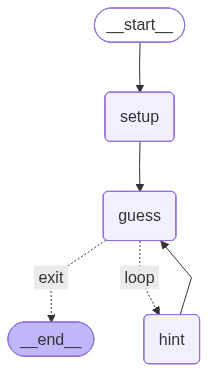

In [5]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({"player_name": "student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20})
result["message"]

1 20
1 6
4 6


'Hi, student. You are right. The answer is 6. You attempt 3 times.'